# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [13]:
#your turn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal? 

   To answer this question, first let's take a look at the pdf and cdf of temperature

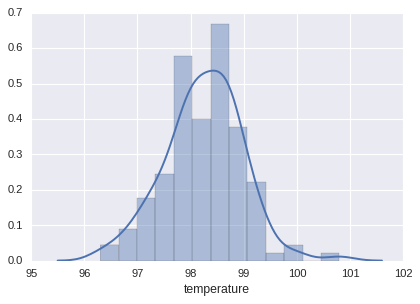

In [6]:
_ = sns.distplot(df.temperature)

From the pdf, it is really close to normal distribution. Let's make a another test.

In [16]:
mean_temp = np.mean(df.temperature)
std_temp = np.std(df.temperature)

In [18]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

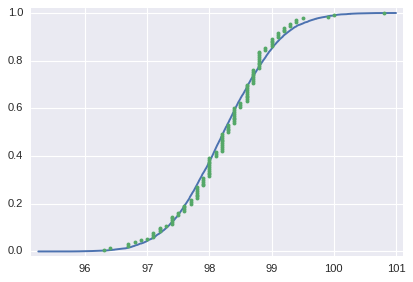

In [22]:
samples = np.random.normal(mean_temp, std_temp, size = 10000)

x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)

Now it is safe to say body temperature is normally distributted.

# 2. Is the sample size large? Are the observations independent? 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


* from the basic information of this dataset, it is not a large-size sample. But it is still large enough to apply z-test
* Since no evidence shows the observations are dependent, we can assume all the observations are independent. (Another reason is that one's body temperature must be independent to others')

# 3. Is the true population mean really 98.6 degrees F?
   * Would you use a one-sample or two-sample test? Why?
     * I'd like to use one-sample test. Because in this problem, we only have one group of data, rather than two 
   * In this situation, is it appropriate to use the $t$ or $z$ statistic? 
     * It is better to use $z$ statistic because the sample size is large enough that we can use sample standard deviation to represent population standard deviation
   * Now try using the other test. How is the result be different? Why?

### Null Hypothesis
$H$0: The true population mean $\mu =$  98.6

$H$1: The true population mean $\mu \neq$   98.6

In [12]:
sample_mean=np.mean(df.temperature)
mu = 98.6
Std = np.std(df.temperature)
n = len(df)
sigma = Std/np.sqrt(n)
score = (sample_mean - mu) / sigma
print("If t-test, t-statistic: {:.4f} represent less than 1% that mean of human temperature is {}".format(score, mu))
print("If z-test, z-statistic: {:.4f} represent less than 0.02 % that mean of human temperature is {}".format(score, mu))

If t-test, t-statistic: -5.4759 represent less than 1% that mean of human temperature is 98.6
If z-test, z-statistic: -5.4759 represent less than 0.02 % that mean of human temperature is 98.6


So both t-test and z-test lead to the same result: it is safe to reject that mean of human temperature is 98.6

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

   * Start by computing the margin of error and confidence interval. 

In [14]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [17]:
lower, mean, upper = mean_confidence_interval(df.temperature, confidence = 0.95)
print("The 95% confidence interval is [{:.5f}, {:.5f}]".format(lower, upper))

The 95% confidence interval is [98.24923, 98.37646]


So we are 95% confident that human temperature will be in range of (98.24923, 98.37646).
Temperature below or above that range could be considered as "abnormal"

# 5. Is there a significant difference between males and females in normal temperature?

 * What test did you use and why?
   * Clearly it is a two-sample test problem, because we have two different groups of people. So I will use two-sample test and z-test (because of the sample size)
 * Write a story with your conclusion in the context of the original problem. 

### Null Hypothesis
$H$0: No difference between males and females in temperature: $\mu_f - \mu_m = 0$

$H$1: Difference do exist between males and females in temperature: $\mu_f - \mu_m \neq 0$

In [18]:
F_df = df[df.gender == 'F']
M_df = df[df.gender == 'M']

In [29]:
mu_f = np.mean(F_df.temperature)
mu_m = np.mean(M_df.temperature)
mu = mu_f - mu_m
Std_f = np.std(F_df.temperature)
Std_m = np.std(F_df.temperature)
n_f = len(F_df)
n_m = len(M_df)
sigma_f = Std_f/np.sqrt(n_f)
sigma_m = Std_m/np.sqrt(n_m)
sigma = np.sqrt(sigma_f ** 2 + sigma_m ** 2)

Calculate z-statistic:

In [41]:
z = (mu - 0) / sigma
print("z-statistic = {:.5f}".format(z))

z-statistic = 2.23501


If we choose significance level $\alpha = 0.05$, the accompny z-statistic is $z = 1.9673$

In [42]:
alpha = 0.05
z_alpha = 1.9673

Since z value of our data smaller than z at significance level of 0.05 ($z = 2.23501 > z_alpha = 1.9673$),
it is safe to reject $H$0 that the difference between males and females temperature do exist.

Margin of error:

In [43]:
print("Marginof error for z-test: {:.4f}".format(z_alpha * sigma))

Marginof error for z-test: 0.2546


Confidence interval:

In [44]:
print("z-test confidence interval: ({:.4f}, {:.4f})".format((mu - z_alpha*sigma), (mu + z_alpha*sigma)))

z-test confidence interval: (0.0346, 0.5438)


From the confidence interval we calculated, we are 95% sure females normal temperature is a higher than males normal temperature.